---
jupyter: python3
format:
  html:
    theme : yeti
    toc: true
    code-fold: true #enable code dropdown for html outptu  
    toc-title: Contents
execute:
    echo: false  #True=show code in output, false=don't
---

In [10]:
import numpy as np
import random
from collections import Counter
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support,classification_report,confusion_matrix, ConfusionMatrixDisplay
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer        
from nltk.stem import WordNetLemmatizer 
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score 
from sklearn.metrics import precision_score 
from sklearn.metrics import recall_score

# Introduction to Decision Tree

A decision tree is a graph that resembles a tree, with nodes denoting the locations where we choose an attribute(feature) and pose a question, edges denoting the responses to the question, and leaves denoting the actual output or class label. 


In this section, we will use the decision tree method to do the binary classification which also called binary decision tree. So, each note in the binary decision tree will split the data into two groups(classes) of data until we are left with pure leaf node which means all of its data belongs to a single class.

The data we will apply decision tree on can be found here https://digital.csic.es/handle/10261/226973?mode=full and this is a marijuana related data. I will use the data from this research paper to train the Decision Tree. The dataset is uploaded in an Excel format, containing 4 sheets: Table 1, Table 2, Publications and Abbreviations and Explanations . The main sheet is Table 1, which contains 2332 rows and 38 columns and Table 1 is the one we are going to use. We will use the column Plant parts used which consists of 11 sub columns and system category column which represents what parts of the body will the marijuana be used for to train the decision tree model. In the end, we can use the model to predict what part of body the marijuana will be used based on the part of marijuana.

# Data Cleaning
In this part, we will remove or fix incorrect, corrupted, incorrectly formatted, duplicate, or incomplete data within a dataset.


In [56]:
df=pd.read_csv("Weed usage.csv")
df=df[ ['In', 'L', 'Wp',
       'Se*', 'Ap', 'St', 'Bk', 'Rt', 'TwB', 'Sh', 'O','System category']]

In [57]:
df["System category"].values


array(['Unclassified', 'Digestive system and nutritional disorders',
       'Infections and infestations', ...,
       'Nervous system and mental disorders', 'Pain and inflammations',
       'Musculoskeletal system disorders and traumas'], dtype=object)

The table above is the data. from column "Ln" to "O" represents the parts of marijuana. Those columns only have binary representations (0 or 1). 
<br>
"Ln" represents Inflorescence
<br>
"L" represents Leaf
<br>
"Wp" represents Whole plant
<br>
"Se*" represents Seed 
<br>
"Ap" represents	Aerial part
<br>
"St" represents	Stem
<br>
"Bk" represents Bark
<br>
"Rt" represents Root
<br>
"TwB" represents Twig and branch
<br>
"Sh" represents Shoot
<br>
"O" represents Other plant parts
<br>

The System category column has 17 different values and they are "circulatory system and blood disorders", "digestive system and nutritional disorders"," endocrine system and metabolic disorders", "genitourinary system disorders", "immune system disorders and neoplasia", "infections and infestations", "musculoskeletal system disorders and traumas", "nervous system and mental disorders"," pain and inflammations"," poisoning, pregnancy", "birth and puerperal disorders", "respiratory system disorders", "sensory system disorders", "skin and subcutaneous tissue disorders", "tonic and restorative and unclassified".
<br>

By removing the the row without values on System category column and the row with no value on all Plant parts columns. or negative values on Plant parts columns

In [58]:
df=df[df["System category"].astype("str") != "nan"]

df=df.loc[(df[ ['In', 'L', 'Wp',
       'Se*', 'Ap', 'St', 'Bk', 'Rt', 'TwB', 'Sh', 'O']]!=0).any(axis=1)]

df

,In,L,Wp,Se*,Ap,St,Bk,Rt,TwB,Sh,O,System category
1,0,1,0,0,0,0,0,0,0,0,0,Digestive system and nutritional disorders
2,0,1,0,0,0,0,0,0,0,0,0,Infections and infestations
3,0,1,0,0,0,0,0,0,0,0,0,Infections and infestations
4,0,0,0,1,0,0,0,0,0,0,0,"Pregnancy, birth and puerperal disorders"
5,0,0,0,1,0,0,0,0,0,0,0,Veterinary use
...,...,...,...,...,...,...,...,...,...,...,...,...
2325,1,1,0,0,0,0,0,0,0,0,0,Nervous system and mental disorders
2326,1,1,0,0,0,0,0,0,0,0,0,Nervous system and mental disorders
2327,1,1,0,0,0,0,0,0,0,0,0,Nervous system and mental disorders
2328,1,1,0,0,0,0,0,0,0,0,0,Pain and inflammations


# EDA

exploring data 

(12, 12)


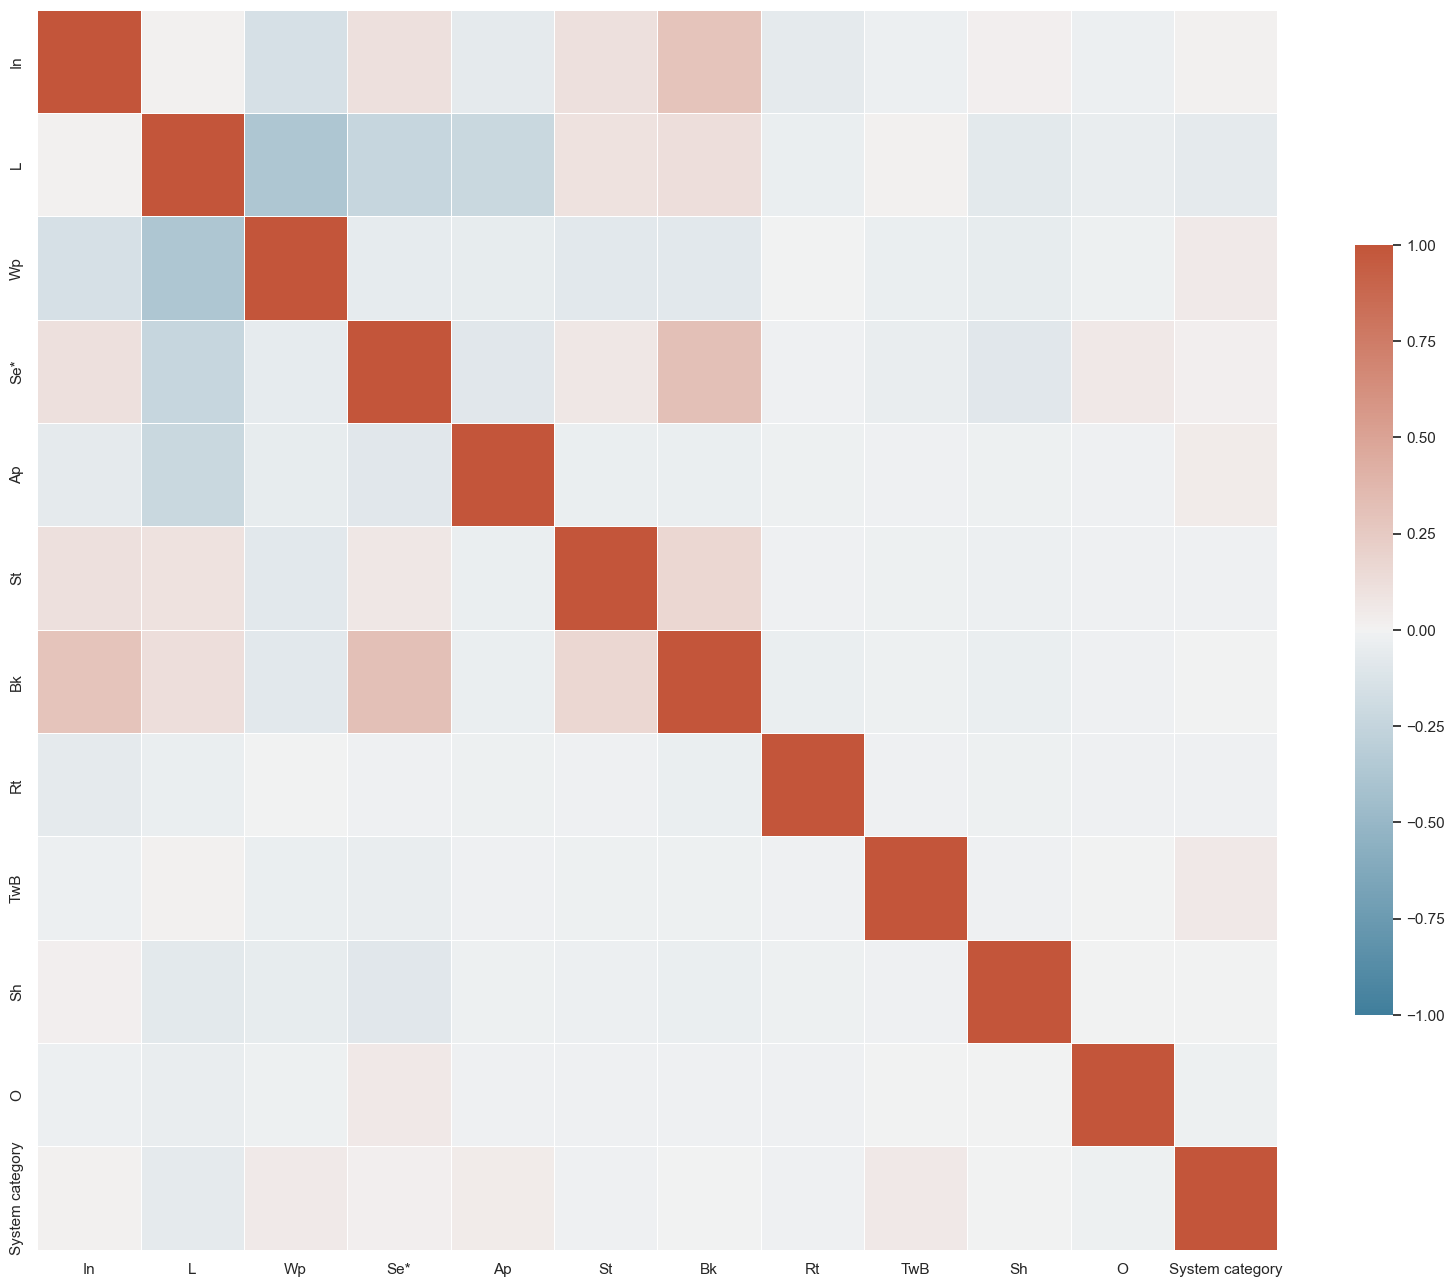

In [85]:
import seaborn as sns
corr = df.corr();  #print(corr)					#COMPUTE CORRELATION OF FEATER MATRIX
print(corr.shape)
sns.set_theme(style="white")
f, ax = plt.subplots(figsize=(20, 20))  # Set up the matplotlib figure
cmap = sns.diverging_palette(230, 20, as_cmap=True) 	# Generate a custom diverging colormap
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr,  cmap=cmap, vmin=-1, vmax=1, center=0,
        square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

Correlation Heat map

In [88]:
df.sample(n=10,axis=1)

,Se*,L,Bk,Rt,TwB,In,Ap,O,St,System category
1,0,1,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,1
3,0,1,0,0,0,0,0,0,0,1
4,1,0,0,0,0,0,0,0,0,2
5,1,0,0,0,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...
2325,0,1,0,0,0,1,0,0,0,5
2326,0,1,0,0,0,1,0,0,0,5
2327,0,1,0,0,0,1,0,0,0,5
2328,0,1,0,0,0,1,0,0,0,7


(1584, 12)


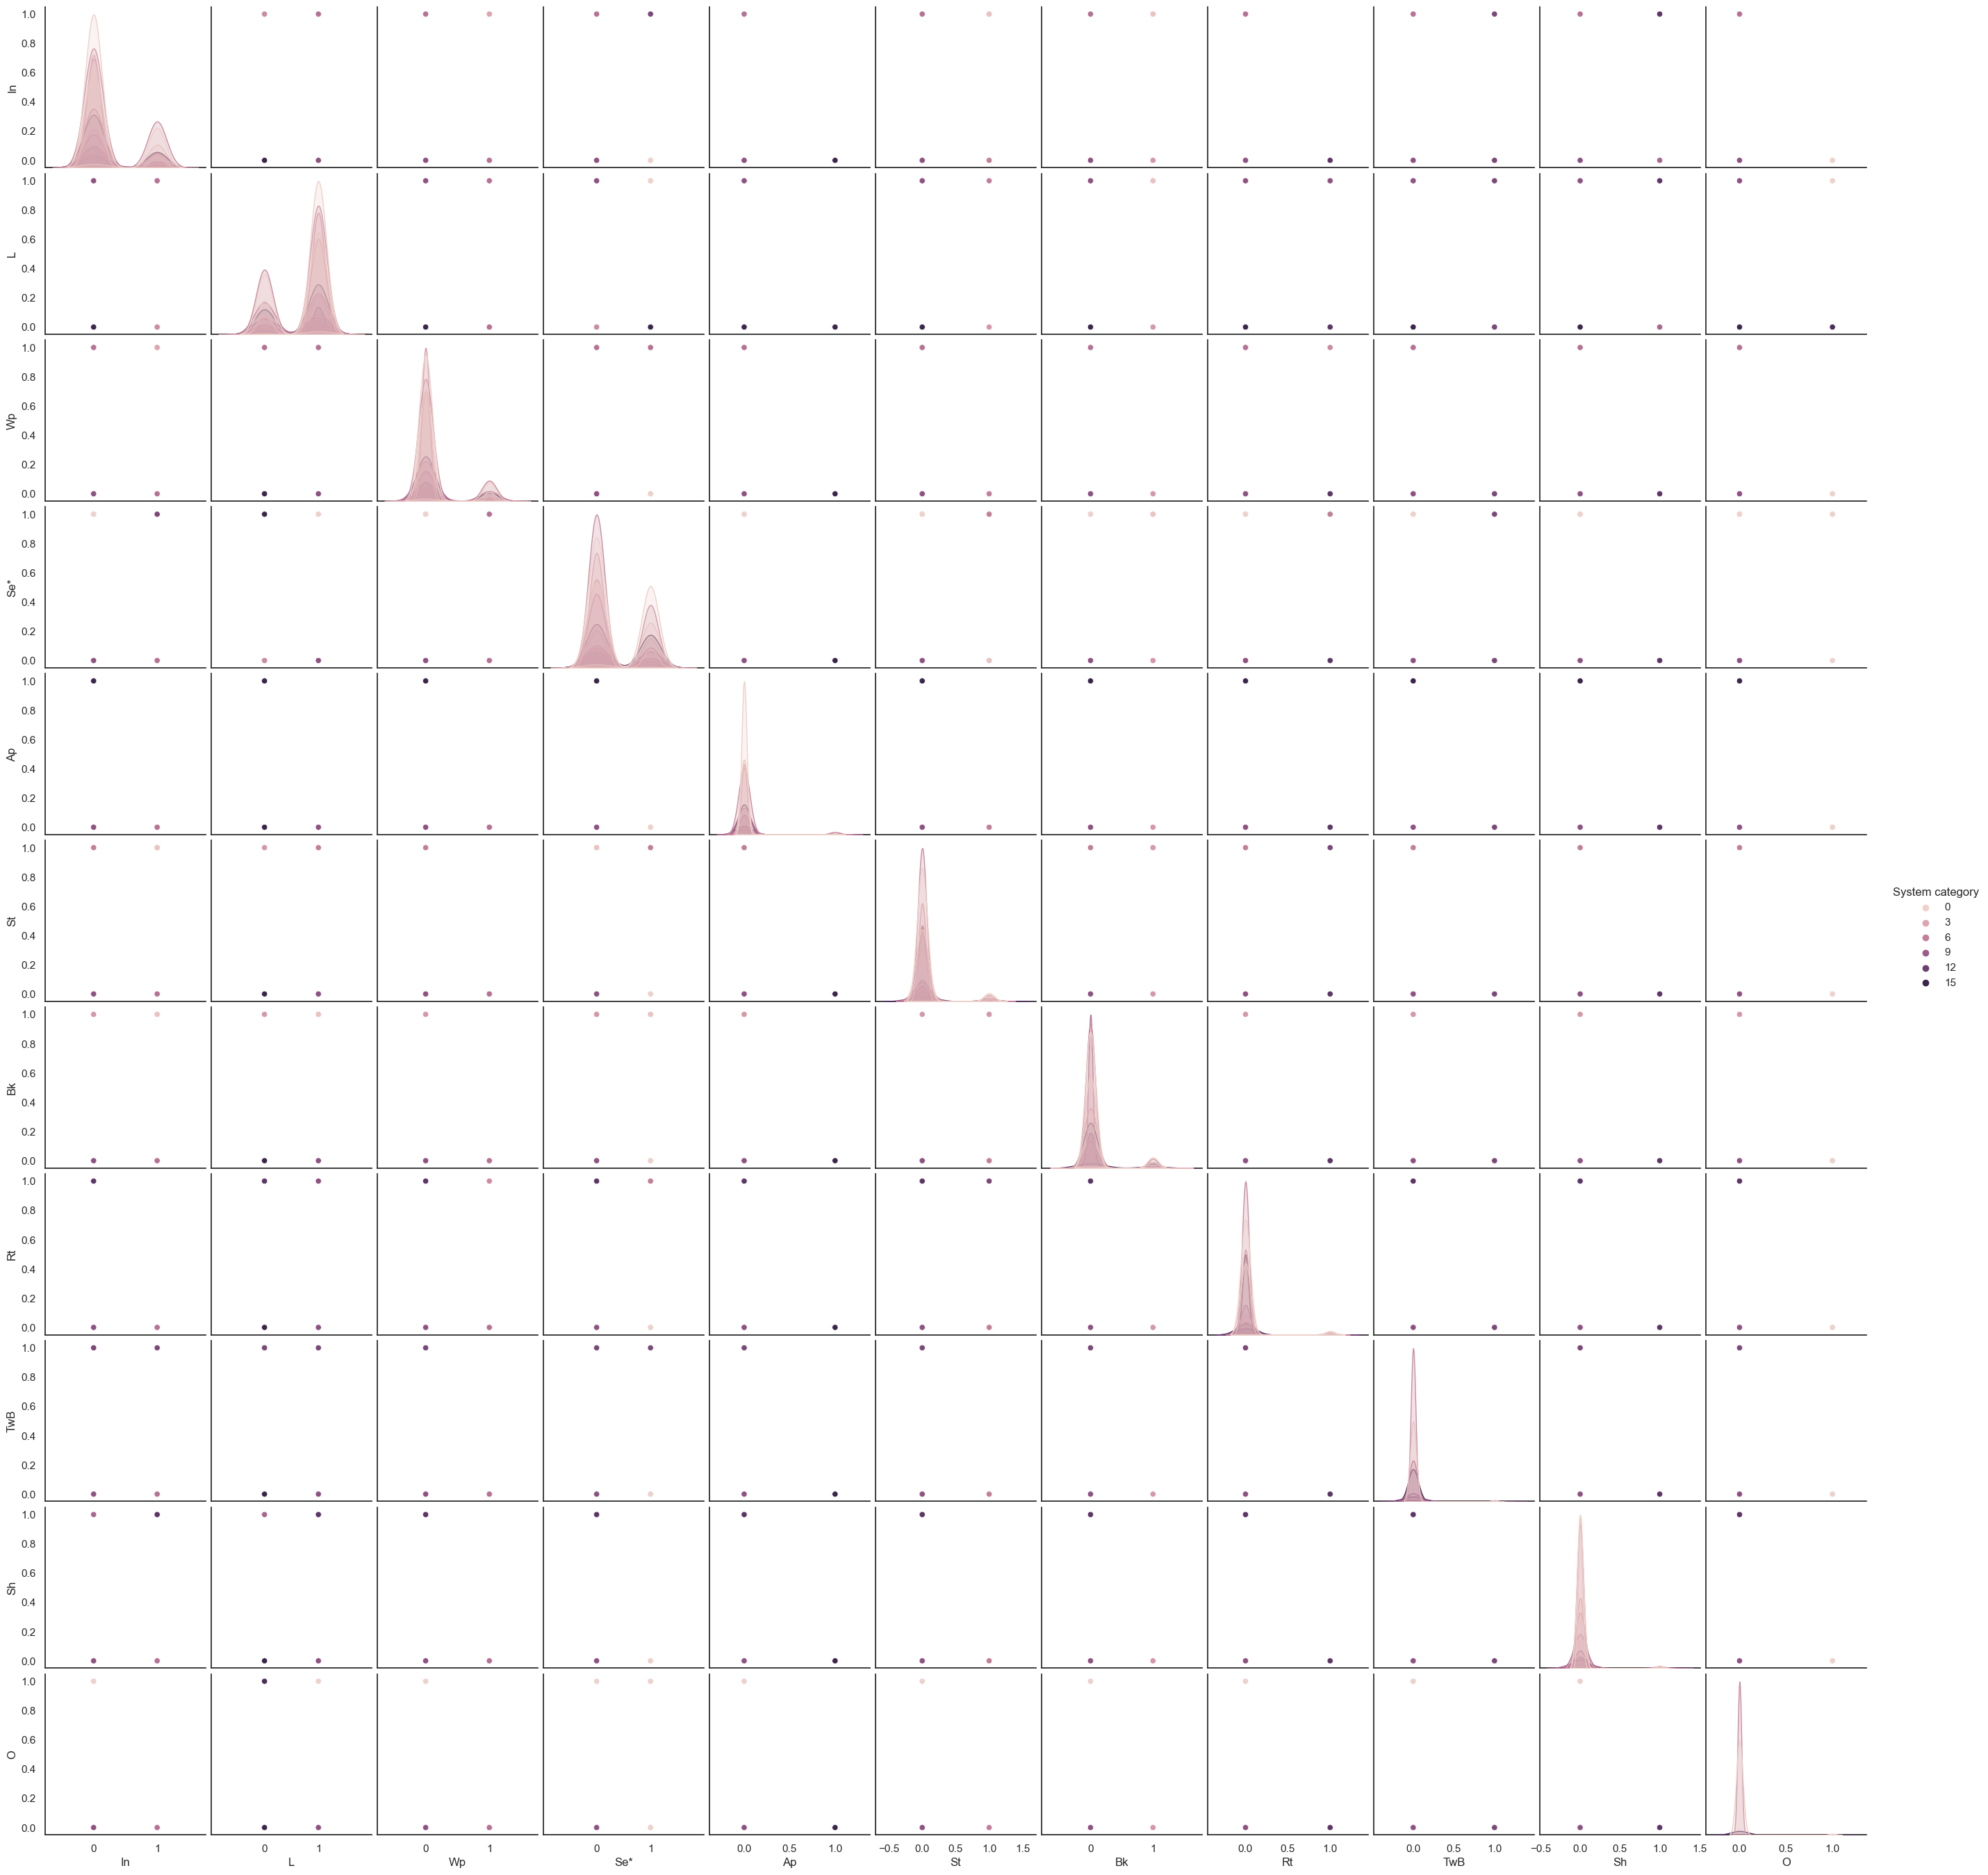

In [91]:
tmp=df
print(tmp.shape)
sns.pairplot(tmp,hue="System category", diag_kind='kde')
plt.show()

After removing all blank rows, we only have 1584 rows left

# Class Distribution

In this part, I will show the distribution of the class labels in the dataset

In [62]:
labels=[]
for i in df["System category"].unique():
    labels.append(i)

df["System category"]=df["System category"].apply(labels.index)


In [7]:
df["System category"].value_counts()

0     262
5     251
1     172
4     145
3     135
7     116
15    114
10     64
6      62
12     49
8      43
11     38
9      37
13     33
14     29
16     25
2       9
Name: System category, dtype: int64

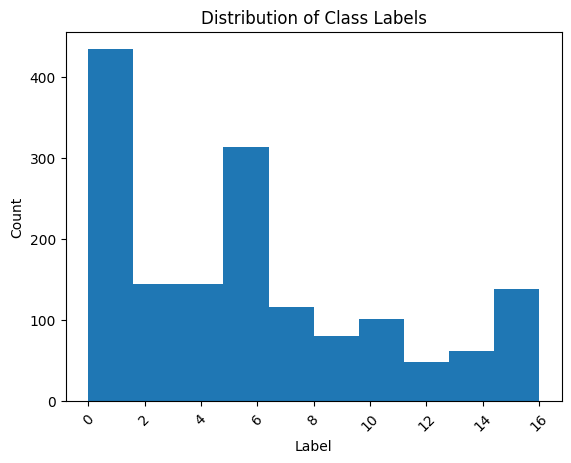

{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10, 11: 11, 12: 12, 13: 13, 14: 14, 15: 15, 16: 16}


In [63]:

plt.hist(df["System category"])
plt.xticks(rotation = 45)
plt.title("Distribution of Class Labels")
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()


print(dict(zip(labels, range(len(labels)))))

I rename each class from 0-16 and the text under the graph is the numerical label and its corresponding text label. The plot shows that data class is unbalanced. The label "0" has most count among all the classes.

# Baseline model for comparison

In this part. We will define a classification method called "random classifier" that randomly chooses the label between the classes and we will use the random selection as our predicted labels. So, the random classifier will give us the worse case for the given classification problem and we can use the result from the random classifier to compare the result from DT model we are going to use later. 


Since we just do the random selection so how well the random classifier does depends on the number of classes, and the load balance between classes. 

In [66]:
X=df.iloc[:,range(11)]
y=df["System category"]

In [67]:
def random_classifier(y_data):
    ypred=[]
    max_label=np.max(y_data) #print(max_label)
    for i in range(0,len(y_data)):
        ypred.append(random.choice(y_data))

    print("-----RANDOM CLASSIFIER-----")
    print("count of prediction:",Counter(ypred).values()) # counts the elements' frequency
    print("probability of prediction:",np.fromiter(Counter(ypred).values(), dtype=float)/len(y_data)) # counts the elements' frequency
    print("accuracy",accuracy_score(y_data, ypred))
    print("percision, recall, fscore,",precision_recall_fscore_support(y_data, ypred))



random_classifier(y.tolist())

-----RANDOM CLASSIFIER-----
count of prediction: dict_values([263, 105, 38, 257, 150, 159, 66, 43, 117, 146, 35, 27, 32, 61, 54, 21, 10])
probability of prediction: [0.16603535 0.06628788 0.0239899  0.16224747 0.09469697 0.10037879
 0.04166667 0.02714646 0.07386364 0.09217172 0.02209596 0.01704545
 0.02020202 0.0385101  0.03409091 0.01325758 0.00631313]
accuracy 0.09027777777777778
percision, recall, fscore, (array([0.14068441, 0.12578616, 0.        , 0.06849315, 0.09333333,
       0.14007782, 0.06060606, 0.07619048, 0.02631579, 0.        ,
       0.03278689, 0.        , 0.01851852, 0.03703704, 0.02857143,
       0.06837607, 0.        ]), array([0.14122137, 0.11627907, 0.        , 0.07407407, 0.09655172,
       0.14342629, 0.06451613, 0.06896552, 0.02325581, 0.        ,
       0.03125   , 0.        , 0.02040816, 0.03030303, 0.03448276,
       0.07017544, 0.        ]), array([0.14095238, 0.12084592, 0.        , 0.07117438, 0.09491525,
       0.14173228, 0.0625    , 0.07239819, 0.0246913

# Wrapper Method Feature selection

In this method, a subset of features are selected and train a model using them. This an iterative method in which we start with having no feature in the model. In each iteration, we keep adding the feature which best improves our model till an addition of a new variable does not improve the performance of the model.

In [69]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.tree import DecisionTreeClassifier


clf=DecisionTreeClassifier()
sfs = SequentialFeatureSelector(clf)

sfs.fit(X, y)



d:\python\envs\ANLY580\lib\site-packages\sklearn\feature_selection\_sequential.py:188: FutureWarning: Leaving `n_features_to_select` to None is deprecated in 1.0 and will become 'auto' in 1.3. To keep the same behaviour as with None (i.e. select half of the features) and avoid this warning, you should manually set `n_features_to_select='auto'` and set tol=None when creating an instance.
  warnings.warn(


SequentialFeatureSelector(estimator=DecisionTreeClassifier())

In [70]:
print("number of features",sum(sfs.get_support()))
print("shape of X",sfs.transform(X).shape)
X=sfs.transform(X)

number of features 5
shape of X (1584, 5)


# Data Split

In this part, we split data into four parts which are x_train,y_train,x_test,y_test with ratio = 0.2

In [71]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [72]:
print(type(x_train),x_train.shape)
print(type(y_train),y_train.shape)
print(type(x_test),x_test.shape)
print(type(y_test),y_test.shape)

<class 'numpy.ndarray'> (1267, 5)
<class 'pandas.core.series.Series'> (1267,)
<class 'numpy.ndarray'> (317, 5)
<class 'pandas.core.series.Series'> (317,)


# Training Model


In [73]:
from sklearn import tree
model = DecisionTreeClassifier()
model = model.fit(x_train,y_train)
yp_train = model.predict(x_train)
yp_test = model.predict(x_test)

In [74]:
con_mat_train = confusion_matrix(y_train,yp_train,labels=model.classes_)
con_mat_test = confusion_matrix(y_test,yp_test,labels=model.classes_)

Text(0.5, 1.0, 'confusion matrix for test data')

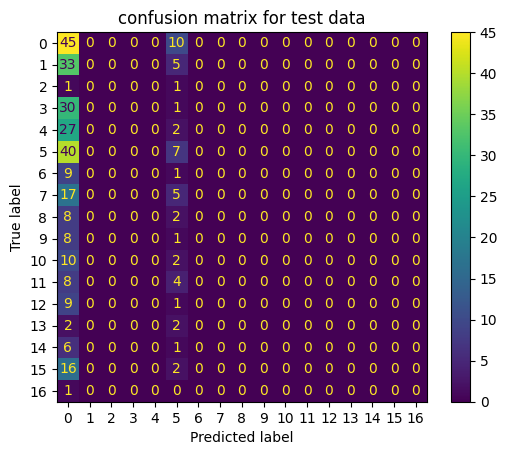

In [75]:
disp = ConfusionMatrixDisplay(confusion_matrix=con_mat_test,
                            display_labels=model.classes_)
disp.plot()
plt.title("confusion matrix for test data")

In [76]:
df_result = classification_report(y_train,yp_train,output_dict=True)
df_result =pd.DataFrame(df_result).T
df_result

d:\python\envs\ANLY580\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\python\envs\ANLY580\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\python\envs\ANLY580\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,precision,recall,f1-score,support
0,0.176252,0.917874,0.295720,207.000000
1,0.000000,0.000000,0.000000,134.000000
2,0.000000,0.000000,0.000000,7.000000
3,0.000000,0.000000,0.000000,104.000000
4,0.000000,0.000000,0.000000,116.000000
5,0.264865,0.240196,0.251928,204.000000
6,0.000000,0.000000,0.000000,52.000000
7,0.333333,0.010638,0.020619,94.000000
8,0.000000,0.000000,0.000000,33.000000
9,0.000000,0.000000,0.000000,28.000000


The result looks so bad. the highest precision is only 0.33 and half of the classes have 0 precision which means they have no correct prediction on their classes. the accuracy of the class is $\frac{45+7} {317}$ = 0.164 which is higher than the one we got from random classifier.

Now, let's see if we can prove the results a little bit by model tuning 

# Hyperparameter Optimization (Model tuning)

For the decision tree model, we have a hyperparameter called max depth which controls the number of layers in the decision tree. The following step is going to change the the max depth and training the model with different max depth, then record the accuracy and recall for each models. Finally, we will choose one with the best performance as our final model.

In [77]:
test_results=[]
train_results=[]

for num_layer in range(1,20):
    model = tree.DecisionTreeClassifier(max_depth=num_layer)
    model = model.fit(x_train,y_train)

    yp_train=model.predict(x_train)
    yp_test=model.predict(x_test)
    test_results.append([num_layer,accuracy_score(y_test, yp_test),recall_score(y_test, yp_test,average=None)])
    train_results.append([num_layer,accuracy_score(y_train, yp_train),recall_score(y_train, yp_train,average=None)])

C:\Users\l7989\AppData\Local\Temp\ipykernel_20528\1786278836.py:9: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  for n, y in enumerate(np.array(train_results)[:,2]):
C:\Users\l7989\AppData\Local\Temp\ipykernel_20528\1786278836.py:12: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(5, 4, n + 1)
C:\Users\l7989\AppData\Local\Temp\ipykernel_20528\1786278836.py:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ax.p

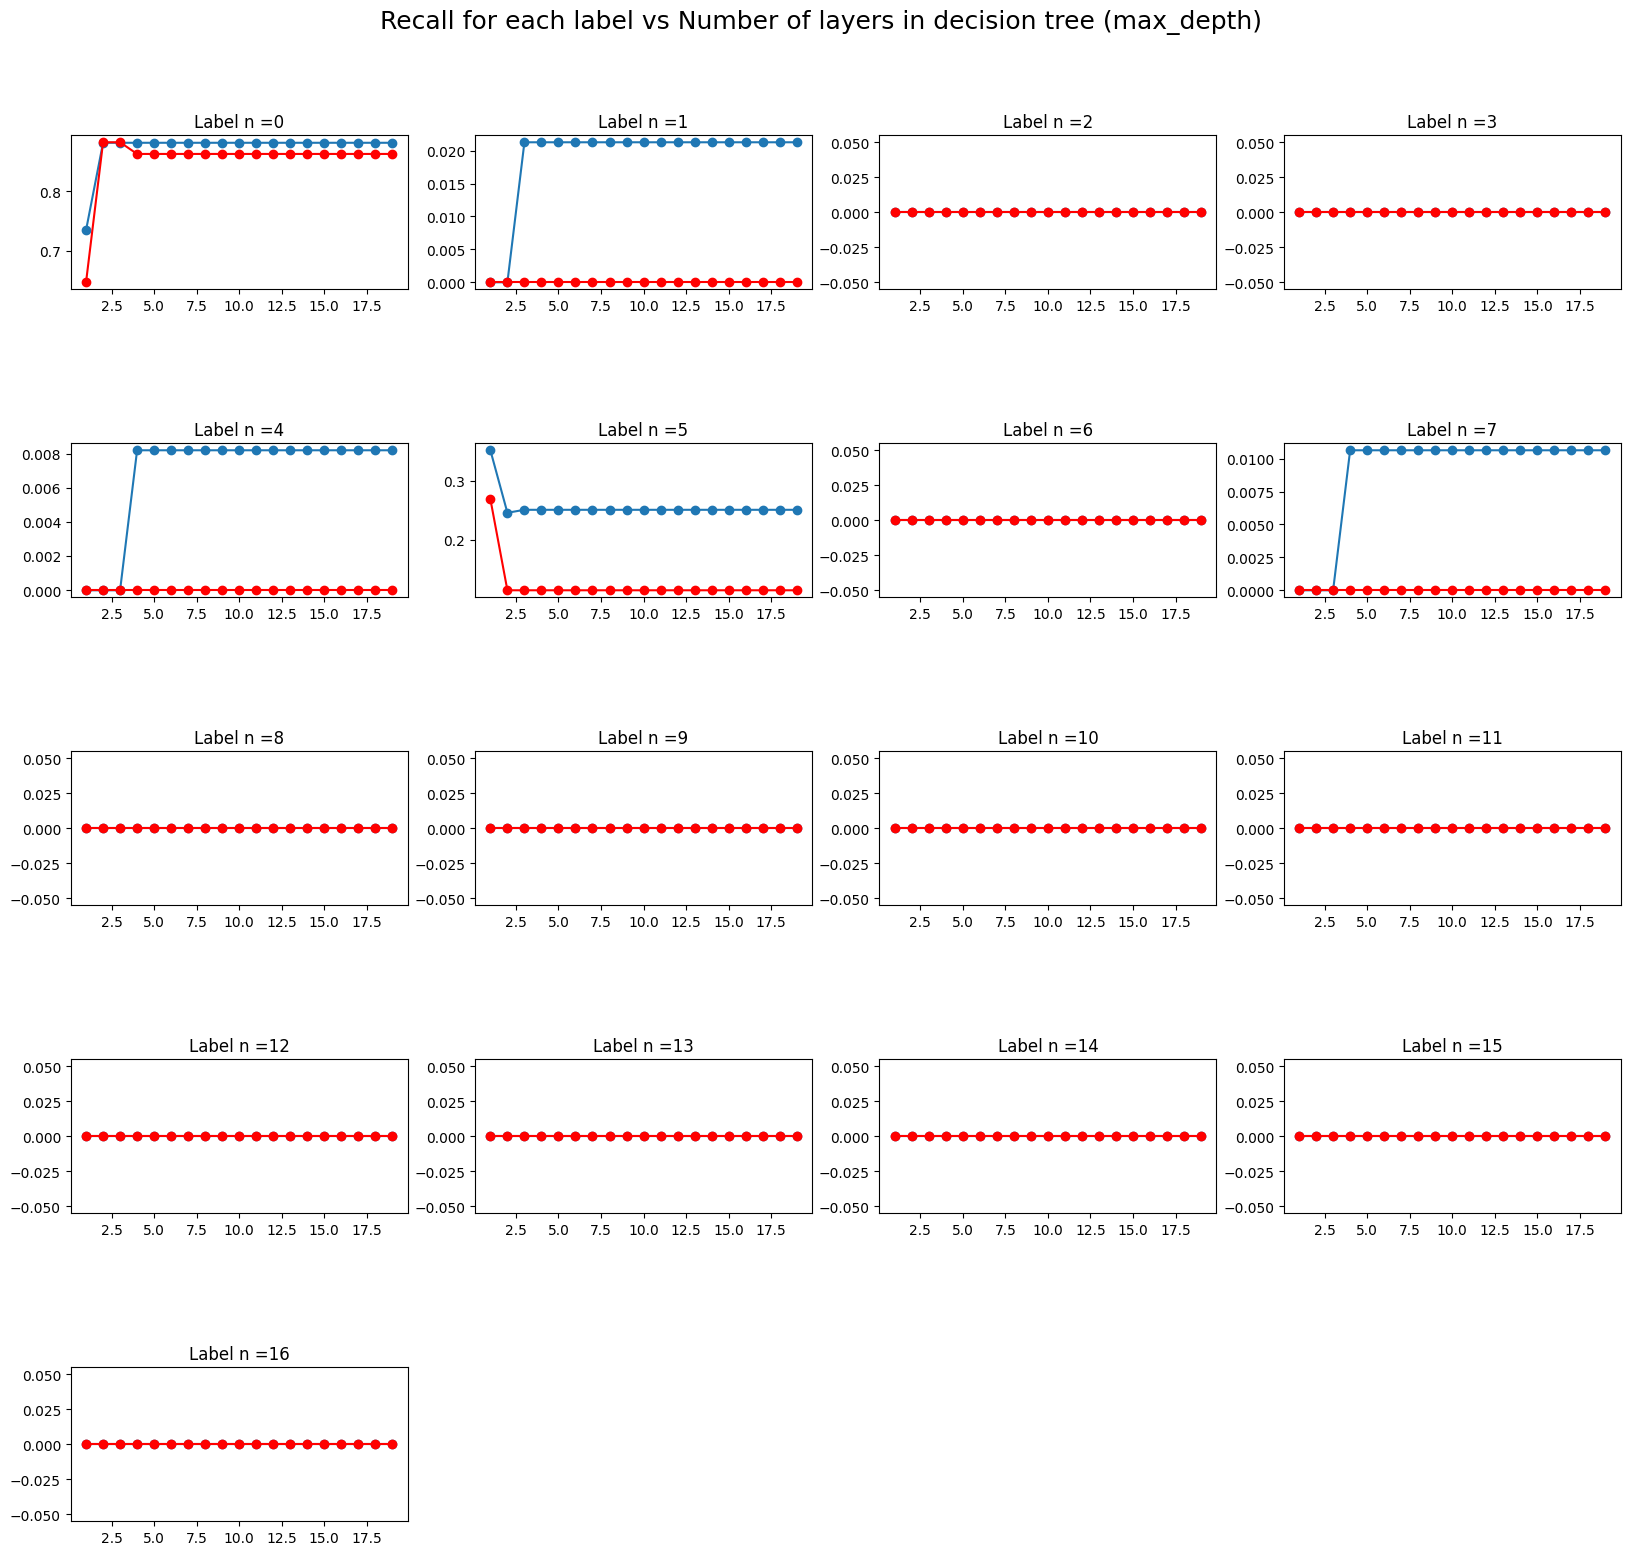

In [25]:
# define subplot grid

plt.figure(figsize=(20, 18))
plt.subplots_adjust(hspace=1)
plt.suptitle("Recall for each label vs Number of layers in decision tree (max_depth)", fontsize=18, y=0.95)
plt.xlabel("Number of layer of decision tree ")
plt.ylabel("RECALL (Y= n): Train(blue); Test(red)")
# loop through tickers and axes
for n, y in enumerate(np.array(train_results)[:,2]):
    if n <=16:
    # add a new subplot iteratively
        ax = plt.subplot(5, 4, n + 1)
    # filter df and plot ticker on the new subplot axis
        ax.plot(np.array(train_results)[:,0],[r[n] for r in np.array(train_results)[:,2]],'-o')
        ax.plot(np.array(test_results)[:,0],[r[n] for r in np.array(test_results)[:,2]],'-o',c="red")
        ax.set_title("Label n =" +str(n))
    else:
        break


plt.show()

From above graph, we can see there is no improvement for the model performance.

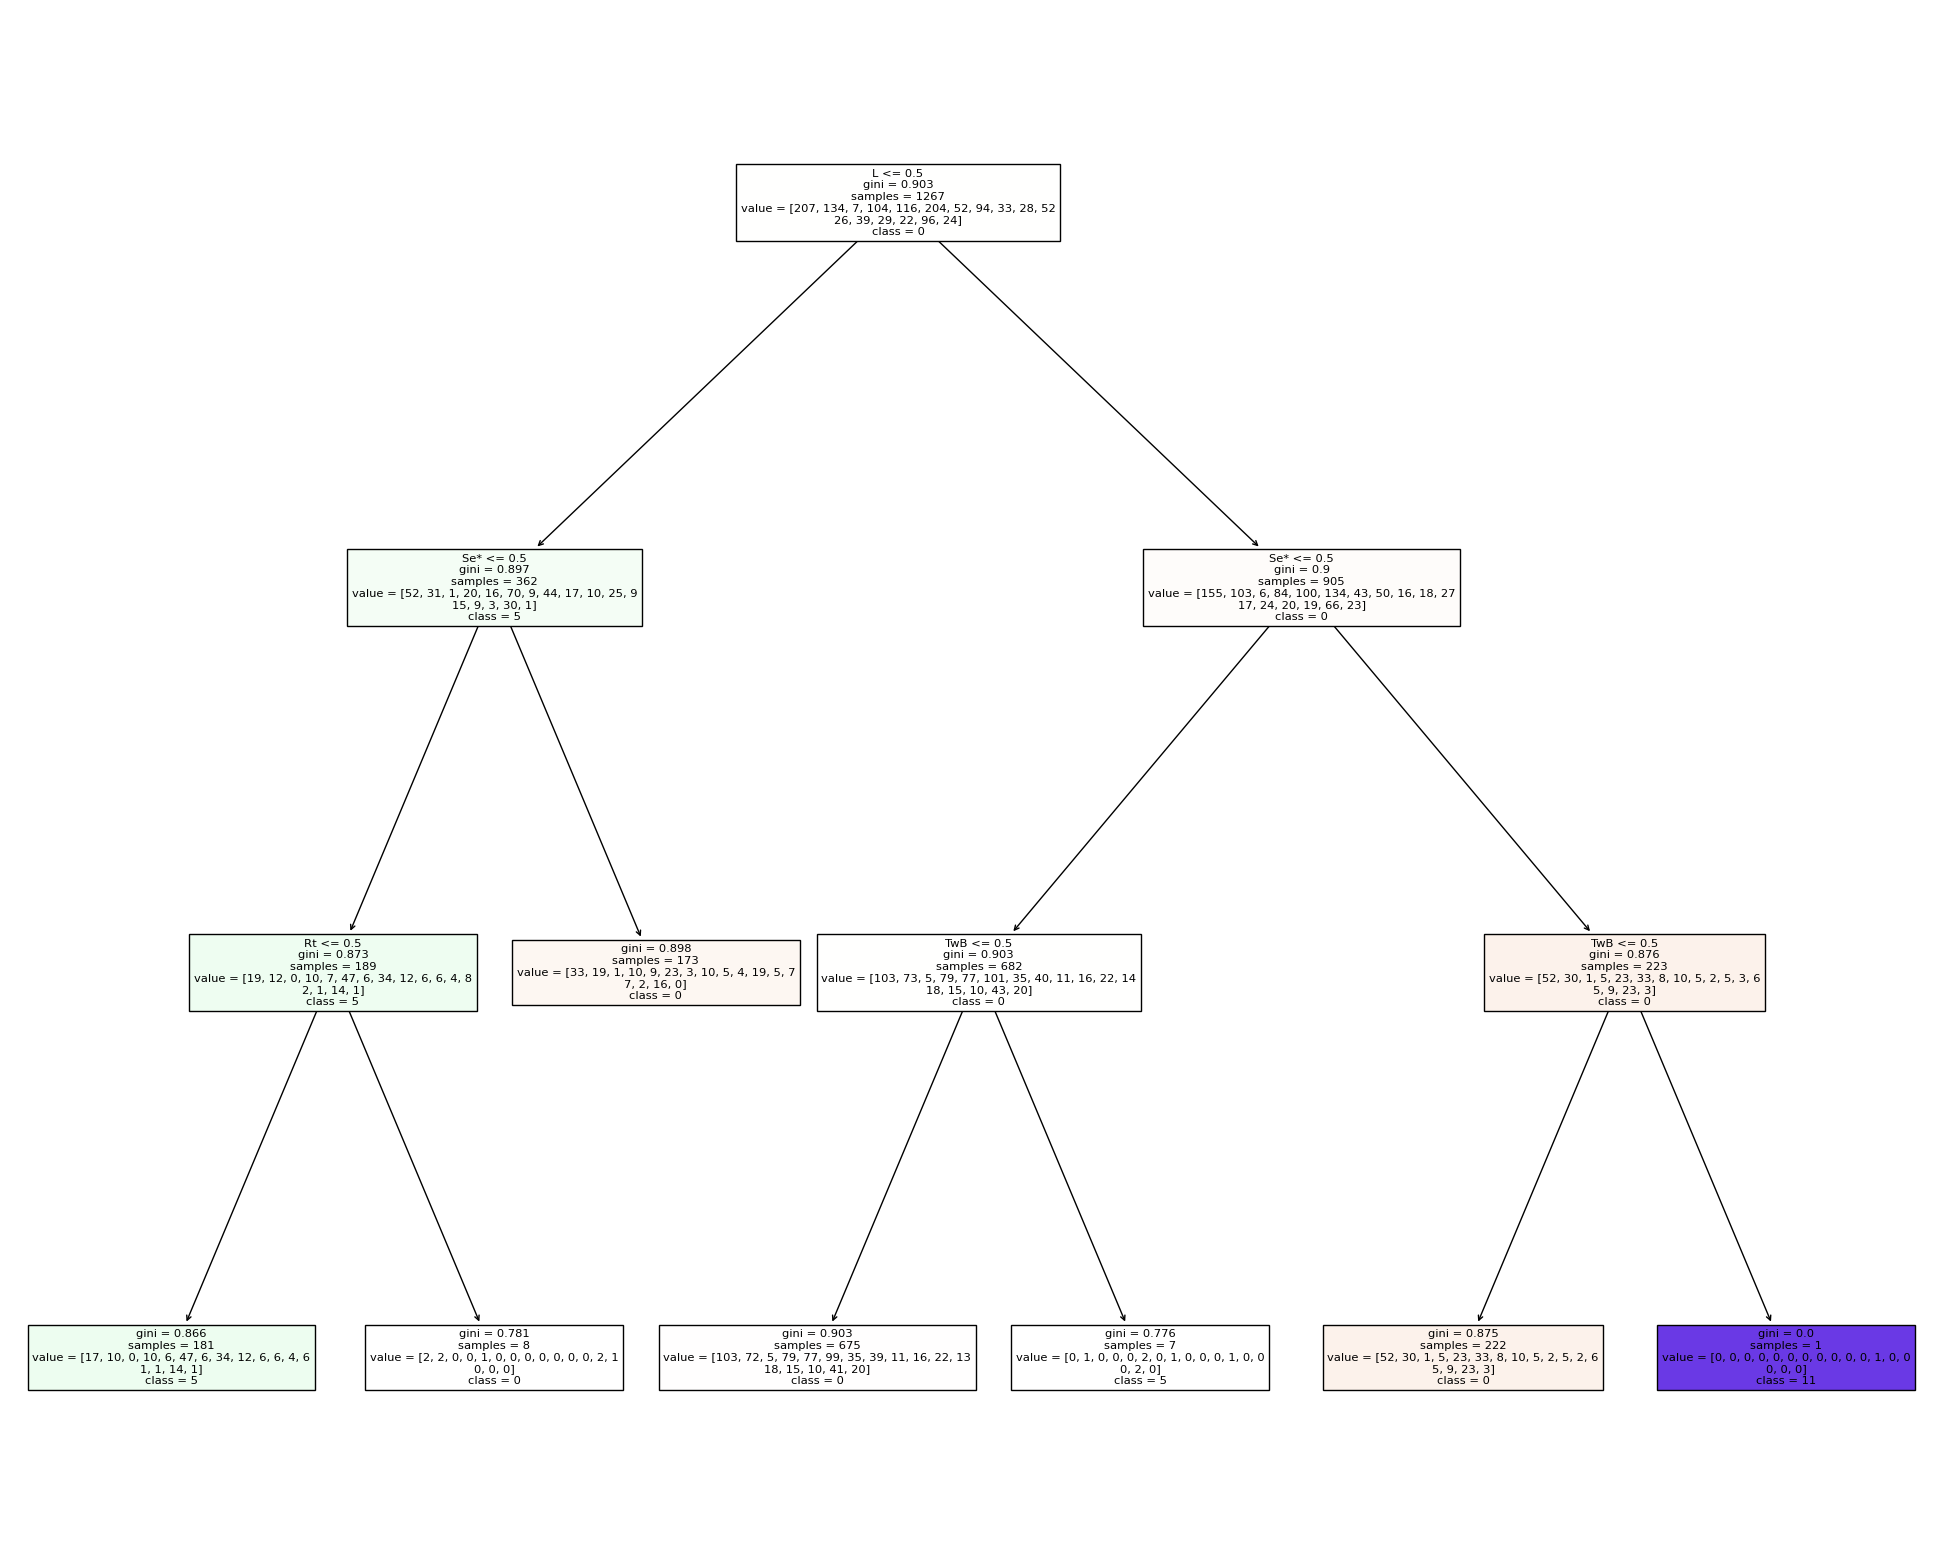

In [82]:
model = tree.DecisionTreeClassifier(max_depth=3)
model = model.fit(x_train,y_train)

yp_train=model.predict(x_train)
yp_test=model.predict(x_test)


def plot_tree(model,X,Y):
    clf = DecisionTreeClassifier()
    fig = plt.figure(figsize=(25,20))
    _ = tree.plot_tree(model, 
                   feature_names=sfs.get_feature_names_out(),  
                   class_names=model.classes_.astype(str),
                   filled=True)




plot_tree(model,X,y)

Descision Tree with number of layers = 3

# Conclusions 

The result is not good. Half of the Classes only have 0 precision and the accuracy is pretty low. So, I list some points that may cause accuracy and performance of the model.


<li>Small sample size</li>

In this dataset, we only have 1584 samples, however, we have 17 classes in the data. So, the average sample size of each class should be around 90 samples/class. Due to the unbalanced distribution of samples/classes (see fig. distribution of class), we can see the label "0" has 250 + samples and label "2" only have 9 samples. So, small number of observations in test data may be too few to give meaningful performance estimate, and/or number of observations in cross-validation data may be too few to guide parameter search optimally.


<li>Low correlation between features and classes  </li>
From pervious heat map, we can see all There is no high correlation between all features and classes. So, there is no point to use these features to predict the classes.


Also, I come up with two ways to solve the issues.

<li>Find more data</li>

Trying to find more data with large number of samples size. Also, Find more feature so we can do feature selection to selection different features that have high correlation with the label classes.


<li>Switch to different models</li>

From my research, it shows that the decision tree algorithm is effective for balanced classification, although it does not perform well on imbalanced datasets. The split points of the tree are chosen to best separate examples into two groups with minimum mixing (by Jason Brownlee on January 29, 2020 in Imbalanced Classification). So, the alternative way is to find a model that can handle imbalanced classification problem.

# Reference

Code: https://github.com/anly501/anly-501-project-yanyanli0/tree/main/codes in 06-decision tree file
